In [30]:
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family= 'NanumGothic')


In [39]:
df = pd.read_csv('C:/Users/admin/Desktop/완친파 전체 연습문제 소스코드 (1)/근로복지공단/근복_제안/근복제안사례 파일모음/근복_제안사례_1p에서13p까지_(utf-8-sig)_result.csv' , encoding = 'utf-8-sig')
df.shape

(50, 13)

In [40]:
df

,인덱스,글번호,공개여부,제목,작성자,등록일,진행현황,현황 및 문제점,제안방안,기대효과,답변자,답변일,답변내용
0,0,433,공개,보험사무대행기관 인가내용변경신고 개선,조상기,2020-06-25,심사완료,보험사무대행기관은 고용산재적용대상이 되는 사업체가 있으면 이를 근로복지공단에 등록...,보험사무대행기관의 지역적 인가내용을 폐지하고 전국 어디라도 할 수 있게 함. 지금은...,"인가신청에 따르는 불편함을 없애고, 승인하는 직원들의 업무량을 축소.",보험재정부,2020-06-26,안녕하십니까? 귀하께서 우리공단 홈페이지를 통해 제출한 제안(“보험사무대행기관의 지...
1,1,427,공개,지로용지(안내문),박용호,2020-06-17,심사완료,지로용지 발송건,발빠르게 카톡으로 알려주는데 고맙습니다 ㆍ근데 지로용지로 가정으로 힌번더 보내주...,근로복지공단 우편요금을 절약할수 있고 행정업무가 간소화되서 직원들 피로감 감소 ㆍ...,운영지원부,2020-06-23,근로복지공단 업무에 관심을 가지고 제안해 주셔서 감사합니다. 현재 공단의 일부 사업...
2,2,425,공개,산재승인 절차에 대하여.,변의중,2020-06-11,심사완료,"5월 6일 산업재해를 입은. 당사자입니다. 일용직은, 사업자가 산재보험이 있는지를 ...","산재 접수시, 우선적으로, 정당한 산업 재해인가를 확인후, 산업재해를 입은 근로자가...",산업 재해 근로자의 빠르고 적절한 치료와 마음편히 회복에 전념할 수 있을 것입니다....,보상계획부,2020-06-15,고객님의 빠른 쾌유를 기원합니다. 우리 공단은 근로자의 업무상 재해를 신속하고 공정...
3,3,423,공개,"고용보험 피보험자격 이력서, 일용근로내역서(모든내역) 출력 해주시길 바랍니다.",조현락,2020-06-04,처리완료,집으로 위 문서 2개 보내주세요. 무료로 건설기초안전교육증 수료하게요,asd,asd,근로복지공단,2020-06-09,안녕하세요 근로복지공단입니다. 등록자분의 의견과 관련해서는 인천북부지사 피보험자관리...
4,4,422,공개,산재 승인에 대하여,변의중,2020-06-03,심사완료,"산재 확인후 확실한 산재라면, 승인후 서류 처리를 하여 환자가 원활한 치료를 받을수...","확실한 산재라면, 승인 후 서류절차를 구비해도 될듯합니다.",환자의 건강이 우선입니다.. 치료시기가 늦추어지지않게하여 빠른치료와 보다 빠른 회복...,보상계획부,2020-06-04,1. 산업재해보상보험법 제1조(목적)에서는 근로자의 업무상의 재해를 신속하고 공정하...
5,5,421,공개,개명을 하였습니다,최윤,2020-05-23,처리완료,개명을 하였는데 공단으로 와야 한다고 합니다 시민도 번거롭고 시간낭비고 공단직원도...,개명시에 미성년자가 아니고 저처럼 실업급여를 받으며 구직활동을 하고 있다면 그 연...,"시민의 불편함 최소화및 시간, 경비절약 연관된 기관도 민원인의 내방으로 인한 낭비 최소화",자격관리부,2020-05-25,"안녕하세요. 근로복지공단 자격관리부입니다. 먼저, 고용보험 피보험자 관련 업무로 불..."
6,6,420,공개,고용.산재보험료 개산프로그램 전산화 가능하면 좋을것 같습니다,송영진,2020-05-15,심사완료,매년 고용 및 산재보험료 납부를 위해 개산보험료 및 확정보험료를 개산하는것이 너무 ...,고용.산재보험료 산출하는 전산 프로그램을 만들어 주세요.전산상으로 업체의 금액을등을...,업무시간단축 및 과거년도 납부내역 확인.업체 담당자의 실수를 줄일수 있어 업체는 시...,보험재정부,2020-05-29,안녕하세요. 근로복지공단 보험재정국 보험재정부입니다. 먼저 바쁘신 가운데에도 우리...
7,7,417,공개,A회사 정직원 b회사 알바했을때 불이익 없나요?,권승영,2020-05-12,처리완료,여기저기 통화 시간이 너무 길어서요 여기다가 글 남겨요 산재보험이요 발생하는게 8일...,ㆍ,ㆍ,근로복지공단,2020-05-12,안녕하세요 근로복지공단입니다. 등록자분 주소지에 해당하는 평택지사 가입지원부 직원에...
8,8,415,공개,직업훈련생계비대출 관련,신승열,2020-05-08,심사완료,직업훈련 생계비대출 관련건에 가족소득을 기준으로 한다는게 말이 안됩니다 저는 현 ...,생계비대출을 가족소득기준이 아닌 개인소득기준으로 다시 돌려놔 주시길 간곡히 요청합니다.,법의 사각지대에서 있는 저같은 사람들에게 희망을 심어줄수 있습니다.,복지계획부,2020-05-15,제안해주셔서 감사합니다. 우리 공단에서 운영하는 직업훈련생계비대부사업은 고용노동부장...
9,9,414,공개,산재 요양승인/반려여부 확인서 발급시 질병으로 산재건 제외하고 발급.,이윤아,2020-05-07,심사완료,업무상 질병으로 인한 산재성립시(인과관계가 불확실할 경우 대부분 마지막 업체에 부여...,산재요양승인/반려여부 확인서 발급시 업무상 질병으로 인한 산재발생건수는 제외하고 발...,업체에서 업무상 질병으로 인한 산재발생시 산재요양승인/반려여부 확인서에 포함되지 않...,보상계획부,2020-05-18,안녕하세요 고객님!!! 먼저 근로복지공단 업무에 대하여 관심을 가져주신점 감사드립니...


In [41]:
df2 = pd.read_csv('C:/Users/admin/Desktop/완친파 전체 연습문제 소스코드 (1)/근로복지공단/근복_제안/근복제안사례 파일모음/근복_제안사례_14p에서16p까지_(utf-8-sig)_result.csv' , encoding = 'utf-8-sig')
df2.shape

(13, 13)

In [42]:
df2

,인덱스,글번호,공개여부,제목,작성자,등록일,진행현황,현황 및 문제점,제안방안,기대효과,답변자,답변일,답변내용
0,0,332,공개,소액체당금 지급 관련 산재보험 적용 대상 사업주,조현숙,2019-09-27,제출,사이트 사업소개 지급요건에 산업재해보상보험법 적용 대상 사업주로서 라고 되어 있는...,"민원팀 052-704-7329 전화해서 문의하니, 산재보험 적용대상이라는 말 뜻이 ...",임금체불로 인해 고통받는 근로자들을 위해서 소액체당금 제도 만들어 놓고 시일도 오래...,임금채권부 담당자,2019-10-25,체당금 제도에 대한 관심과 제안에 감사드립니다. 귀하의 제안은 체당금 지급 관련 사...
1,1,331,공개,산재보험가입,김영미,2019-09-26,제출,저는 속초에서 개인서비스업(인적용역)으로 사업자등록을 내고 명태코다리 만드는 작...,우리같은 소수 사업자들도 제도권 안으로 넣어 주십시요,실제 영세한 사업자들이기에 안정적 으로 일할수 있을겁니다,적용계획부,2020-02-03,바쁘신 와중에 제안하여 주셔서 감사합니다. 고객님께서 문의하신 내용은 2020.1....
2,2,330,공개,이직확인서 처리,이은정,2019-09-25,제출,실업 급여신청시 고용보험 상실 신고와 이직확인서가 필요하다는 것을 알게됐습니다. 상...,고용보험 상실신고처럼 이직확인서도 의무신고 기간이 필요하며 피보험자격확인청구의 처...,다른 업무 처리에 영향을 미치는 이직확인서 의무신고기간 및 피보험자격확인 청구 처...,근로자가입부,2019-09-30,안녕하세요. 귀하의 제안내용은 이직확인서의 제출기한 및 확인청구의 처리기간 단축에 ...
3,3,329,공개,일용근로자 근로신고창구 단일화,이정욱,2019-09-11,제출,"일용근로자 노임 신고를 할때 국세청, 근로복지공단, 건강보험공단, 국민연금공단, ...",노임.com 등의 국가 통합 사이트를 만들어서 이 사이트 한곳에 노임자료를 입력하면...,1. 현재 다양한 창구로 신고하는 노임자료 창구를 통합하여 국민 편의성과 업무 효율...,근로자가입부,2019-10-14,안녕하세요 근로복지공단입니다. 귀하의 제안은 노임신고통합사이트를 만들어 신고토록하고...
4,4,328,공개,산재처리 평균급여,김한도,2019-09-11,제출,일용근로자 일당의 73프로에서 70프로를 계산하여 평균급여로 책정하여 재해자에게 지...,공사현장 사고로 산재가 처리 되어 진다면 그 사고현장에서 받은 일당의 70프로를 지...,누가 책임을 지고 해 주어야 하는가 책임있게 해 주는 공무원이 있어야 효가 나타날텐데,보험급여관리부,2019-09-26,우선 바쁘신 와중에도 저희 공단 홈페이지를 통해 소중한 의견을 주신것에 대해 감사드...
5,5,327,공개,사업주가 고용보험료 개인별 금액을 직접 계산하라니요~~~,김형석,2019-08-30,제출,"소규모사업장을 운영하고 있습니다. 영세하다보니 회계,노무 업무까지 다 맡고 있습니다...",산출 근거를 쉽게 확인할 수 있도록 해주세요.,"세무사나, 노무사, 회계 직원을 쓰기 어려운 소규모 운영자에게 많은 도움이 될 것입니다.",부과운영부,2019-09-10,"1. 안녕하십니까 ? 귀하의 제안내용은 ""고용.산재보험의 보험료 부과 내역 확인'으..."
6,6,323,공개,사업주 친부모는 왜 산재보험에 가입이 않되나?,김정율,2019-08-22,제출,제조업 사업주의 친부모는 산재보험에 가입을 할수 없다는데 왜 그래야만 하는지요 ? ...,산재는 근로자면 누구나 발생할수 있는사안으로 산재보험에 해당이 되어야한다,수없이 많은 유무형 효과를 따지기가 어렵다,근로자가입부,2019-09-03,"1. 안녕하세요. 귀하의 제안내용은 "" 친부모님의 근로자성이 인정되지 않는것에 대한..."
7,7,322,공개,보이는ARS 버튼을 수정해주세요,조아라,2019-08-13,제출,근로복지공단에 전화를 할 때 뜨는 보이는ARS버튼이 불편합니다. 오른쪽 아래에 보이...,보이는ARS버튼을 휴대폰 화면 오른쪽 어래에 고정시키지 말고 다른곳으로 끌어서 이동...,"휴대폰으로 상담하는 동안 즉시 검색하면 상담받을 수 있고, 다시 전화하여 처음부터 ...",경영정보부,2019-08-23,안녕하세요. 근로복지공단입니다. 소중한 의견 주셔서 감사합니다. 보이는ARS 화면 ...
8,8,321,공개,간편본인확인도 되게 수정해주세요.,조아라,2019-08-13,제출,"모바일로 근로복지공단 고객제안신청을 하고자 할 때,본인인증확인을 위해 휴대폰인증을 ...",위 사항에 적었습니다.,보다 많은 시민들이 모바일로 근로복지공단을 이용하기 편리해질 것입니다.,경영정보부,2019-08-23,안녕하세요. 근로복지공단입니다. 소중한 의견 주셔서 감사합니다. 홈페이지 화면 개선...
9,9,316,공개,고용산재토탈서비스 개선 요청,정유수,2019-07-21,처리완료,"고용산재토탈서비스를 사용하고 있습니다. 그런데, 고용산재토탈서비스 사이트는 인터넷익...",고용산재토탈서비스를 모든 브라우저에서 사용할 수 있도록 프로그램 업데이트 부탁드립니다.,고용산재토탈서비스 접근성 강화 및 사용자 편의성 증대,근로복지공단,2019-07-29,안녕하세요 근로복지공단입니다 먼저 바쁘신 와중에 공단에 제안을 해 주셔서 대단히 감...


In [35]:
df3 = pd.read_csv('C:/Users/admin/Desktop/완친파 전체 연습문제 소스코드 (1)/근로복지공단/근복_제안/근복제안사례 파일모음/근복_제안사례_17p에서20p까지_(utf-8-sig)_result.csv' , encoding = 'utf-8-sig')
df3.shape

(20, 13)

In [36]:
df4 = pd.read_csv('C:/Users/admin/Desktop/완친파 전체 연습문제 소스코드 (1)/근로복지공단/근복_제안/근복제안사례 파일모음/근복_제안사례_21p에서23p까지_(utf-8-sig)_result.csv' , encoding = 'utf-8-sig')
df4.shape

(10, 13)

In [43]:
df5 = pd.read_csv('C:/Users/admin/Desktop/완친파 전체 연습문제 소스코드 (1)/근로복지공단/근복_제안/근복제안사례 파일모음/근복_제안사례_24p에서29p까지_(utf-8-sig)_result.csv' , encoding = 'utf-8-sig')
df5.shape

(14, 13)

In [44]:
df6 = pd.read_csv('C:/Users/admin/Desktop/완친파 전체 연습문제 소스코드 (1)/근로복지공단/근복_제안/근복제안사례 파일모음/근복_제안사례_30p에서p39까지_(utf-8-sig)_result.csv' , encoding = 'utf-8-sig')
df6.shape

(39, 13)

In [46]:
df7 = pd.read_csv('C:/Users/admin/Desktop/완친파 전체 연습문제 소스코드 (1)/근로복지공단/근복_제안/근복제안사례 파일모음/근복_제안사례_40p에서p46까지_(utf-8-sig)_result.csv' , encoding = 'utf-8-sig')
df7.shape

(19, 13)

In [48]:
DF = pd.concat([df,df2,df3,df4,df5,df6,df7])

In [50]:
DF.shape

(165, 13)

In [51]:
DF

,인덱스,글번호,공개여부,제목,작성자,등록일,진행현황,현황 및 문제점,제안방안,기대효과,답변자,답변일,답변내용
0,0,433,공개,보험사무대행기관 인가내용변경신고 개선,조상기,2020-06-25,심사완료,보험사무대행기관은 고용산재적용대상이 되는 사업체가 있으면 이를 근로복지공단에 등록...,보험사무대행기관의 지역적 인가내용을 폐지하고 전국 어디라도 할 수 있게 함. 지금은...,"인가신청에 따르는 불편함을 없애고, 승인하는 직원들의 업무량을 축소.",보험재정부,2020-06-26,안녕하십니까? 귀하께서 우리공단 홈페이지를 통해 제출한 제안(“보험사무대행기관의 지...
1,1,427,공개,지로용지(안내문),박용호,2020-06-17,심사완료,지로용지 발송건,발빠르게 카톡으로 알려주는데 고맙습니다 ㆍ근데 지로용지로 가정으로 힌번더 보내주...,근로복지공단 우편요금을 절약할수 있고 행정업무가 간소화되서 직원들 피로감 감소 ㆍ...,운영지원부,2020-06-23,근로복지공단 업무에 관심을 가지고 제안해 주셔서 감사합니다. 현재 공단의 일부 사업...
2,2,425,공개,산재승인 절차에 대하여.,변의중,2020-06-11,심사완료,"5월 6일 산업재해를 입은. 당사자입니다. 일용직은, 사업자가 산재보험이 있는지를 ...","산재 접수시, 우선적으로, 정당한 산업 재해인가를 확인후, 산업재해를 입은 근로자가...",산업 재해 근로자의 빠르고 적절한 치료와 마음편히 회복에 전념할 수 있을 것입니다....,보상계획부,2020-06-15,고객님의 빠른 쾌유를 기원합니다. 우리 공단은 근로자의 업무상 재해를 신속하고 공정...
3,3,423,공개,"고용보험 피보험자격 이력서, 일용근로내역서(모든내역) 출력 해주시길 바랍니다.",조현락,2020-06-04,처리완료,집으로 위 문서 2개 보내주세요. 무료로 건설기초안전교육증 수료하게요,asd,asd,근로복지공단,2020-06-09,안녕하세요 근로복지공단입니다. 등록자분의 의견과 관련해서는 인천북부지사 피보험자관리...
4,4,422,공개,산재 승인에 대하여,변의중,2020-06-03,심사완료,"산재 확인후 확실한 산재라면, 승인후 서류 처리를 하여 환자가 원활한 치료를 받을수...","확실한 산재라면, 승인 후 서류절차를 구비해도 될듯합니다.",환자의 건강이 우선입니다.. 치료시기가 늦추어지지않게하여 빠른치료와 보다 빠른 회복...,보상계획부,2020-06-04,1. 산업재해보상보험법 제1조(목적)에서는 근로자의 업무상의 재해를 신속하고 공정하...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,14,19,공개,대국민 산재보험제도 적극 홍보 실시,이상천,2017-11-30,처리완료,"근로자가 산재보험제도를 인식하는 인지도의 차이가 개개인마다 너무 크고, 대부분을 차...",년간 정기안전보건교육 시간중 20~30% 정도의 시간을 산재보험제도를 소개하도록 법...,어려울 것 같았던 산재보험도 근로자들이 자동차보험이나 실손보험처럼 쉽게 느끼고 이용...,홍보부,2017-12-06,안녕하세요. 근로복지공단입니다. 우선 바쁘신 와중에 우리 공단에 대한 관심으로 고...
15,15,18,공개,내일채움공제와 유사한 방식의 근로자 임대주택 지원,민준표,2017-11-29,처리완료,1) 무주택 서민 실수요자들의 내집마련이 쉽지 않고 2) 3d업종 등 신규인력 채용...,고용산재 보험에 가입한 사업장에서 0년 이상 장기 근속시 임대주택에 저렴한 비용으로...,1) 무주택 서민 실수요자들 주거 안정 지원 2) 3d업종 등 신규인력 채용 유인책...,복지계획부,2017-12-01,안녕하십니까. 고객님의 제안에 대하여 검토한 결과를 알려드립니다. 제안하신 내용은 ...
16,16,15,공개,안산 스마트 허브 체육시설 설치 요청,엄태진,2017-11-28,처리완료,스마트 허브 회사 근린에 체육시설이 없음,"장소: 경기도 안산시 단원구 목내동 산 63-3 운동기구 설치 : 농구 골대,...",근로자 근무지 인근에 생활체육 시설 설치로 근로 복지 향상,성과평가부,2017-12-28,안녕하세요. 근로복지공단입니다. 우선 바쁘신 와중에 우리 공단에 대한 관심으로 국...
17,17,14,공개,근로복지공단은 고리대업자 인가? 근로자의 복지를 위한 기관인가?,이인숙,2017-11-22,제출,저는 2017. 10. 26. 갑자기 원금 천만원과 이자 오백여만원(원금의 50% ...,근로복지공단(담당)은 불리한 부분은 답변을 회피하고 불만 있으면 민사청구명령 이의신...,근로복지공단(담당)은 불리한 부분은 답변을 회피하고 불만 있으면 민사청구명령 이의신...,고금용,2018-01-09,"청렴옴부즈만 신고(2017.11.22.) ""근로복지공단은 고리대업자인가? 근로자의복..."


In [52]:
pwd

'C:\\Users\\admin\\Desktop\\완친파 전체 연습문제 소스코드 (1)\\근로복지공단\\근복_제안'

In [53]:
# DF.to_csv("근복제안_result(utf-8-sig).csv", encoding ="utf-8-sig")

In [54]:
DF

,인덱스,글번호,공개여부,제목,작성자,등록일,진행현황,현황 및 문제점,제안방안,기대효과,답변자,답변일,답변내용
0,0,433,공개,보험사무대행기관 인가내용변경신고 개선,조상기,2020-06-25,심사완료,보험사무대행기관은 고용산재적용대상이 되는 사업체가 있으면 이를 근로복지공단에 등록...,보험사무대행기관의 지역적 인가내용을 폐지하고 전국 어디라도 할 수 있게 함. 지금은...,"인가신청에 따르는 불편함을 없애고, 승인하는 직원들의 업무량을 축소.",보험재정부,2020-06-26,안녕하십니까? 귀하께서 우리공단 홈페이지를 통해 제출한 제안(“보험사무대행기관의 지...
1,1,427,공개,지로용지(안내문),박용호,2020-06-17,심사완료,지로용지 발송건,발빠르게 카톡으로 알려주는데 고맙습니다 ㆍ근데 지로용지로 가정으로 힌번더 보내주...,근로복지공단 우편요금을 절약할수 있고 행정업무가 간소화되서 직원들 피로감 감소 ㆍ...,운영지원부,2020-06-23,근로복지공단 업무에 관심을 가지고 제안해 주셔서 감사합니다. 현재 공단의 일부 사업...
2,2,425,공개,산재승인 절차에 대하여.,변의중,2020-06-11,심사완료,"5월 6일 산업재해를 입은. 당사자입니다. 일용직은, 사업자가 산재보험이 있는지를 ...","산재 접수시, 우선적으로, 정당한 산업 재해인가를 확인후, 산업재해를 입은 근로자가...",산업 재해 근로자의 빠르고 적절한 치료와 마음편히 회복에 전념할 수 있을 것입니다....,보상계획부,2020-06-15,고객님의 빠른 쾌유를 기원합니다. 우리 공단은 근로자의 업무상 재해를 신속하고 공정...
3,3,423,공개,"고용보험 피보험자격 이력서, 일용근로내역서(모든내역) 출력 해주시길 바랍니다.",조현락,2020-06-04,처리완료,집으로 위 문서 2개 보내주세요. 무료로 건설기초안전교육증 수료하게요,asd,asd,근로복지공단,2020-06-09,안녕하세요 근로복지공단입니다. 등록자분의 의견과 관련해서는 인천북부지사 피보험자관리...
4,4,422,공개,산재 승인에 대하여,변의중,2020-06-03,심사완료,"산재 확인후 확실한 산재라면, 승인후 서류 처리를 하여 환자가 원활한 치료를 받을수...","확실한 산재라면, 승인 후 서류절차를 구비해도 될듯합니다.",환자의 건강이 우선입니다.. 치료시기가 늦추어지지않게하여 빠른치료와 보다 빠른 회복...,보상계획부,2020-06-04,1. 산업재해보상보험법 제1조(목적)에서는 근로자의 업무상의 재해를 신속하고 공정하...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,14,19,공개,대국민 산재보험제도 적극 홍보 실시,이상천,2017-11-30,처리완료,"근로자가 산재보험제도를 인식하는 인지도의 차이가 개개인마다 너무 크고, 대부분을 차...",년간 정기안전보건교육 시간중 20~30% 정도의 시간을 산재보험제도를 소개하도록 법...,어려울 것 같았던 산재보험도 근로자들이 자동차보험이나 실손보험처럼 쉽게 느끼고 이용...,홍보부,2017-12-06,안녕하세요. 근로복지공단입니다. 우선 바쁘신 와중에 우리 공단에 대한 관심으로 고...
15,15,18,공개,내일채움공제와 유사한 방식의 근로자 임대주택 지원,민준표,2017-11-29,처리완료,1) 무주택 서민 실수요자들의 내집마련이 쉽지 않고 2) 3d업종 등 신규인력 채용...,고용산재 보험에 가입한 사업장에서 0년 이상 장기 근속시 임대주택에 저렴한 비용으로...,1) 무주택 서민 실수요자들 주거 안정 지원 2) 3d업종 등 신규인력 채용 유인책...,복지계획부,2017-12-01,안녕하십니까. 고객님의 제안에 대하여 검토한 결과를 알려드립니다. 제안하신 내용은 ...
16,16,15,공개,안산 스마트 허브 체육시설 설치 요청,엄태진,2017-11-28,처리완료,스마트 허브 회사 근린에 체육시설이 없음,"장소: 경기도 안산시 단원구 목내동 산 63-3 운동기구 설치 : 농구 골대,...",근로자 근무지 인근에 생활체육 시설 설치로 근로 복지 향상,성과평가부,2017-12-28,안녕하세요. 근로복지공단입니다. 우선 바쁘신 와중에 우리 공단에 대한 관심으로 국...
17,17,14,공개,근로복지공단은 고리대업자 인가? 근로자의 복지를 위한 기관인가?,이인숙,2017-11-22,제출,저는 2017. 10. 26. 갑자기 원금 천만원과 이자 오백여만원(원금의 50% ...,근로복지공단(담당)은 불리한 부분은 답변을 회피하고 불만 있으면 민사청구명령 이의신...,근로복지공단(담당)은 불리한 부분은 답변을 회피하고 불만 있으면 민사청구명령 이의신...,고금용,2018-01-09,"청렴옴부즈만 신고(2017.11.22.) ""근로복지공단은 고리대업자인가? 근로자의복..."


In [55]:
del DF['인덱스']
DF

,글번호,공개여부,제목,작성자,등록일,진행현황,현황 및 문제점,제안방안,기대효과,답변자,답변일,답변내용
0,433,공개,보험사무대행기관 인가내용변경신고 개선,조상기,2020-06-25,심사완료,보험사무대행기관은 고용산재적용대상이 되는 사업체가 있으면 이를 근로복지공단에 등록...,보험사무대행기관의 지역적 인가내용을 폐지하고 전국 어디라도 할 수 있게 함. 지금은...,"인가신청에 따르는 불편함을 없애고, 승인하는 직원들의 업무량을 축소.",보험재정부,2020-06-26,안녕하십니까? 귀하께서 우리공단 홈페이지를 통해 제출한 제안(“보험사무대행기관의 지...
1,427,공개,지로용지(안내문),박용호,2020-06-17,심사완료,지로용지 발송건,발빠르게 카톡으로 알려주는데 고맙습니다 ㆍ근데 지로용지로 가정으로 힌번더 보내주...,근로복지공단 우편요금을 절약할수 있고 행정업무가 간소화되서 직원들 피로감 감소 ㆍ...,운영지원부,2020-06-23,근로복지공단 업무에 관심을 가지고 제안해 주셔서 감사합니다. 현재 공단의 일부 사업...
2,425,공개,산재승인 절차에 대하여.,변의중,2020-06-11,심사완료,"5월 6일 산업재해를 입은. 당사자입니다. 일용직은, 사업자가 산재보험이 있는지를 ...","산재 접수시, 우선적으로, 정당한 산업 재해인가를 확인후, 산업재해를 입은 근로자가...",산업 재해 근로자의 빠르고 적절한 치료와 마음편히 회복에 전념할 수 있을 것입니다....,보상계획부,2020-06-15,고객님의 빠른 쾌유를 기원합니다. 우리 공단은 근로자의 업무상 재해를 신속하고 공정...
3,423,공개,"고용보험 피보험자격 이력서, 일용근로내역서(모든내역) 출력 해주시길 바랍니다.",조현락,2020-06-04,처리완료,집으로 위 문서 2개 보내주세요. 무료로 건설기초안전교육증 수료하게요,asd,asd,근로복지공단,2020-06-09,안녕하세요 근로복지공단입니다. 등록자분의 의견과 관련해서는 인천북부지사 피보험자관리...
4,422,공개,산재 승인에 대하여,변의중,2020-06-03,심사완료,"산재 확인후 확실한 산재라면, 승인후 서류 처리를 하여 환자가 원활한 치료를 받을수...","확실한 산재라면, 승인 후 서류절차를 구비해도 될듯합니다.",환자의 건강이 우선입니다.. 치료시기가 늦추어지지않게하여 빠른치료와 보다 빠른 회복...,보상계획부,2020-06-04,1. 산업재해보상보험법 제1조(목적)에서는 근로자의 업무상의 재해를 신속하고 공정하...
...,...,...,...,...,...,...,...,...,...,...,...,...
14,19,공개,대국민 산재보험제도 적극 홍보 실시,이상천,2017-11-30,처리완료,"근로자가 산재보험제도를 인식하는 인지도의 차이가 개개인마다 너무 크고, 대부분을 차...",년간 정기안전보건교육 시간중 20~30% 정도의 시간을 산재보험제도를 소개하도록 법...,어려울 것 같았던 산재보험도 근로자들이 자동차보험이나 실손보험처럼 쉽게 느끼고 이용...,홍보부,2017-12-06,안녕하세요. 근로복지공단입니다. 우선 바쁘신 와중에 우리 공단에 대한 관심으로 고...
15,18,공개,내일채움공제와 유사한 방식의 근로자 임대주택 지원,민준표,2017-11-29,처리완료,1) 무주택 서민 실수요자들의 내집마련이 쉽지 않고 2) 3d업종 등 신규인력 채용...,고용산재 보험에 가입한 사업장에서 0년 이상 장기 근속시 임대주택에 저렴한 비용으로...,1) 무주택 서민 실수요자들 주거 안정 지원 2) 3d업종 등 신규인력 채용 유인책...,복지계획부,2017-12-01,안녕하십니까. 고객님의 제안에 대하여 검토한 결과를 알려드립니다. 제안하신 내용은 ...
16,15,공개,안산 스마트 허브 체육시설 설치 요청,엄태진,2017-11-28,처리완료,스마트 허브 회사 근린에 체육시설이 없음,"장소: 경기도 안산시 단원구 목내동 산 63-3 운동기구 설치 : 농구 골대,...",근로자 근무지 인근에 생활체육 시설 설치로 근로 복지 향상,성과평가부,2017-12-28,안녕하세요. 근로복지공단입니다. 우선 바쁘신 와중에 우리 공단에 대한 관심으로 국...
17,14,공개,근로복지공단은 고리대업자 인가? 근로자의 복지를 위한 기관인가?,이인숙,2017-11-22,제출,저는 2017. 10. 26. 갑자기 원금 천만원과 이자 오백여만원(원금의 50% ...,근로복지공단(담당)은 불리한 부분은 답변을 회피하고 불만 있으면 민사청구명령 이의신...,근로복지공단(담당)은 불리한 부분은 답변을 회피하고 불만 있으면 민사청구명령 이의신...,고금용,2018-01-09,"청렴옴부즈만 신고(2017.11.22.) ""근로복지공단은 고리대업자인가? 근로자의복..."


In [56]:
df = DF.copy()

In [57]:
df.describe()

,글번호
count,165.000000
mean,241.733333
std,125.397424
min,11.000000
25%,137.000000
50%,267.000000
75%,349.000000
max,433.000000


In [58]:
problem = df['현황 및 문제점']

In [61]:
problem.shape

(165,)

In [62]:
problem_list= []
for i in problem:
    problem_list.append(i)

    


In [64]:
text = ' '.join(problem_list)

okt = Okt()
noun = okt.nouns(text)
len(noun)

7866

In [65]:
# 한글자 제거
noun = [i for i in noun if len(i)>=2]
len(noun)

6696

In [66]:
from collections import Counter

count = Counter(noun)
noun_list= count.most_common(100)
noun_list[:10]

[('산재', 122),
 ('보험', 120),
 ('공단', 89),
 ('고용', 84),
 ('경우', 77),
 ('신고', 72),
 ('근로', 66),
 ('복지', 58),
 ('신청', 57),
 ('근로자', 55)]

In [67]:
noun_list[:100]

[('산재', 122),
 ('보험', 120),
 ('공단', 89),
 ('고용', 84),
 ('경우', 77),
 ('신고', 72),
 ('근로', 66),
 ('복지', 58),
 ('신청', 57),
 ('근로자', 55),
 ('가입', 51),
 ('급여', 51),
 ('사업', 50),
 ('업무', 46),
 ('처리', 46),
 ('확인', 45),
 ('지급', 43),
 ('보험료', 41),
 ('병원', 39),
 ('현재', 36),
 ('직원', 35),
 ('환자', 34),
 ('지원', 33),
 ('부분', 32),
 ('생각', 31),
 ('운영', 31),
 ('관리', 30),
 ('개인', 29),
 ('전화', 29),
 ('기관', 28),
 ('사람', 28),
 ('담당자', 27),
 ('납부', 27),
 ('회사', 26),
 ('해당', 26),
 ('문제', 26),
 ('대한', 26),
 ('일자리', 25),
 ('발생', 24),
 ('업체', 23),
 ('토탈', 23),
 ('상황', 22),
 ('건강', 22),
 ('서비스', 22),
 ('정산', 22),
 ('출력', 21),
 ('금액', 21),
 ('퇴직', 21),
 ('적용', 20),
 ('청구', 20),
 ('제출', 20),
 ('안정', 20),
 ('기간', 20),
 ('상실', 20),
 ('서류', 19),
 ('소득', 19),
 ('기준', 19),
 ('자금', 19),
 ('대상', 18),
 ('임금', 18),
 ('요청', 18),
 ('제도', 18),
 ('파견', 18),
 ('접수', 18),
 ('개선', 18),
 ('대해', 18),
 ('센터', 17),
 ('지사', 17),
 ('입력', 17),
 ('때문', 17),
 ('보수', 17),
 ('부담', 17),
 ('본인', 17),
 ('치료', 16),
 ('통화', 16),
 ('또한', 16),
 ('변경

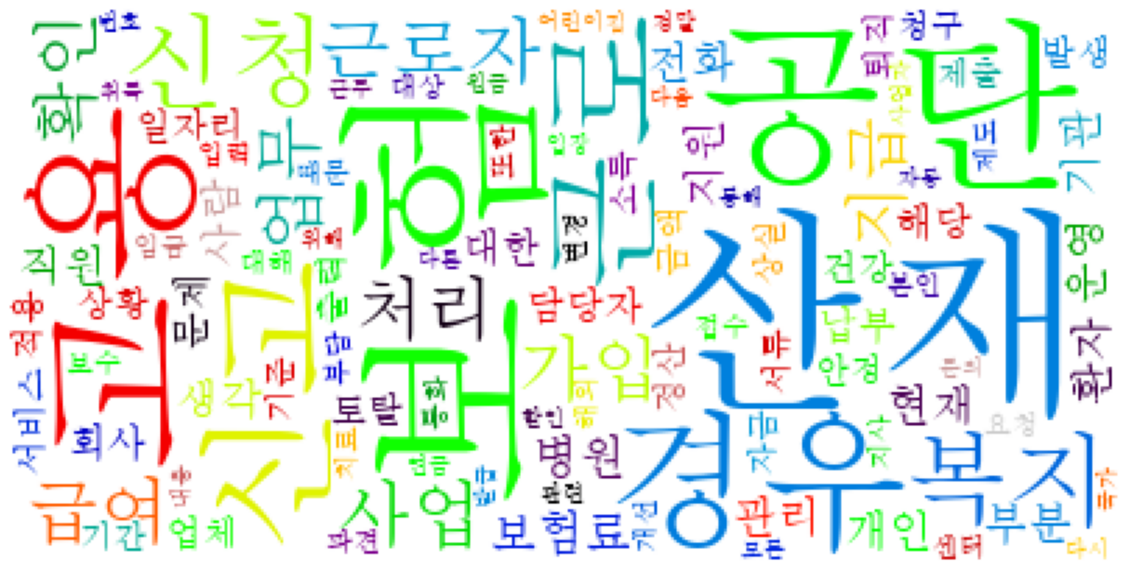

In [72]:
wordcloud = WordCloud(font_path="C:/Windows/Fonts/batang.ttc",
                     background_color ='white',
                     max_words =100,
                     colormap='nipy_spectral').generate_from_frequencies(dict(noun_list))


fig = plt.figure(figsize=(20,15))

plt.axis('off')
plt.imshow(wordcloud)
plt.show()


In [74]:
len(noun_list)

100

In [78]:
noun_list[0:10]

[('산재', 122),
 ('보험', 120),
 ('공단', 89),
 ('고용', 84),
 ('경우', 77),
 ('신고', 72),
 ('근로', 66),
 ('복지', 58),
 ('신청', 57),
 ('근로자', 55)]

In [79]:
san_noun2=[]
for i,j in noun_list:
    san_noun2.append(i)
    
san_noun2[0:10]

['산재', '보험', '공단', '고용', '경우', '신고', '근로', '복지', '신청', '근로자']

In [82]:
from collections import Counter
num_top_nouns = 20
san_nouns_counter = Counter(noun)

san_top_nouns_100 = dict(san_nouns_counter.most_common(num_top_nouns))


san_top_nouns_100 # 딕셔너리로 만들고 


{'산재': 122,
 '보험': 120,
 '공단': 89,
 '고용': 84,
 '경우': 77,
 '신고': 72,
 '근로': 66,
 '복지': 58,
 '신청': 57,
 '근로자': 55,
 '가입': 51,
 '급여': 51,
 '사업': 50,
 '업무': 46,
 '처리': 46,
 '확인': 45,
 '지급': 43,
 '보험료': 41,
 '병원': 39,
 '현재': 36}

In [84]:
import re

san_sentences = []
for post in df['현황 및 문제점']:
    san_sentences.extend(re.split('; |\.|\?|\!', post))
san_sentences[0:10]

['보험사무대행기관은 고용산재적용대상이 되는 사업체가 있으면  이를 근로복지공단에 등록하고 업무를 대행합니다',
 '이에 보험사무대행기관이 공단에 지역적으로 인가가 되어 있지않으면 등록이 안됩니다',
 ' 문제점: 사업체가 비인가지역에 있으면 이를 인가받아야 하는 불편과 이를 승인하는 직원의 업무가중으로 보입니다',
 '',
 '지로용지 발송건',
 '5월 6일 산업재해를 입은',
 ' 당사자입니다',
 ' 일용직은, 사업자가 산재보험이 있는지를 물어보며 일을 다니지 않습니다',
 ' 사실  매번 일 나가서 물어볼수도 없는 것이리라 생각됩니다',
 ' 혹시나 필자처럼']

In [85]:
san_sentences_nouns = []
for sentence in san_sentences:
    okt = Okt()
    #san_noun = okt.nouns(text)
    sentence_nouns = okt.nouns(sentence)
    san_sentences_nouns.append(sentence_nouns)
san_sentences_nouns[0:10]

[['보험',
  '사무',
  '대행',
  '기관',
  '고용',
  '산재',
  '적용',
  '대상',
  '업체',
  '근로',
  '복지',
  '공단',
  '등록',
  '업무',
  '대행'],
 ['이', '보험', '사무', '대행', '기관', '공단', '지역', '등록'],
 ['문제점', '업체', '비', '지역', '인', '불편', '승인', '직원', '업무', '가중'],
 [],
 ['지로', '용지', '발송', '건'],
 ['산업', '재해'],
 ['당사자'],
 ['일용직', '사업자', '산재', '보험', '일'],
 ['사실', '매번', '일', '것', '리라', '생각'],
 ['혹시', '필자']]

In [87]:
san_noun2

['산재',
 '보험',
 '공단',
 '고용',
 '경우',
 '신고',
 '근로',
 '복지',
 '신청',
 '근로자',
 '가입',
 '급여',
 '사업',
 '업무',
 '처리',
 '확인',
 '지급',
 '보험료',
 '병원',
 '현재',
 '직원',
 '환자',
 '지원',
 '부분',
 '생각',
 '운영',
 '관리',
 '개인',
 '전화',
 '기관',
 '사람',
 '담당자',
 '납부',
 '회사',
 '해당',
 '문제',
 '대한',
 '일자리',
 '발생',
 '업체',
 '토탈',
 '상황',
 '건강',
 '서비스',
 '정산',
 '출력',
 '금액',
 '퇴직',
 '적용',
 '청구',
 '제출',
 '안정',
 '기간',
 '상실',
 '서류',
 '소득',
 '기준',
 '자금',
 '대상',
 '임금',
 '요청',
 '제도',
 '파견',
 '접수',
 '개선',
 '대해',
 '센터',
 '지사',
 '입력',
 '때문',
 '보수',
 '부담',
 '본인',
 '치료',
 '통화',
 '또한',
 '변경',
 '해외',
 '어린이집',
 '다음',
 '다른',
 '관련',
 '발급',
 '내용',
 '번호',
 '입장',
 '통해',
 '국가',
 '문의',
 '원금',
 '취득',
 '다시',
 '자동',
 '할인',
 '정말',
 '사업자',
 '위해',
 '연금',
 '모든',
 '근무']

In [88]:
san_word2id = {w: i for i, w in enumerate(san_top_nouns_100.keys())}
san_word2id

{'산재': 0,
 '보험': 1,
 '공단': 2,
 '고용': 3,
 '경우': 4,
 '신고': 5,
 '근로': 6,
 '복지': 7,
 '신청': 8,
 '근로자': 9,
 '가입': 10,
 '급여': 11,
 '사업': 12,
 '업무': 13,
 '처리': 14,
 '확인': 15,
 '지급': 16,
 '보험료': 17,
 '병원': 18,
 '현재': 19}

In [89]:
san_id2word = {i: w for i, w in enumerate(san_top_nouns_100.keys())}
san_id2word

{0: '산재',
 1: '보험',
 2: '공단',
 3: '고용',
 4: '경우',
 5: '신고',
 6: '근로',
 7: '복지',
 8: '신청',
 9: '근로자',
 10: '가입',
 11: '급여',
 12: '사업',
 13: '업무',
 14: '처리',
 15: '확인',
 16: '지급',
 17: '보험료',
 18: '병원',
 19: '현재'}

In [90]:
san_word2id

{'산재': 0,
 '보험': 1,
 '공단': 2,
 '고용': 3,
 '경우': 4,
 '신고': 5,
 '근로': 6,
 '복지': 7,
 '신청': 8,
 '근로자': 9,
 '가입': 10,
 '급여': 11,
 '사업': 12,
 '업무': 13,
 '처리': 14,
 '확인': 15,
 '지급': 16,
 '보험료': 17,
 '병원': 18,
 '현재': 19}

In [91]:
import numpy as np
san_adjacent_matrix = np.zeros((num_top_nouns, num_top_nouns), int)
for sentence in san_sentences_nouns:
    for wi, i in san_word2id.items():
        if wi in sentence:
            for wj, j in san_word2id.items():
                if i != j and wj in sentence:
                    san_adjacent_matrix[i][j] += 1
san_adjacent_matrix

array([[ 0, 42, 14, 36,  9, 12,  6,  5,  9, 17, 18,  6, 19, 12, 12,  8,
         5, 10,  8,  9],
       [42,  0, 19, 38, 11, 13, 11,  9,  5, 12, 20,  9, 16,  7,  7,  9,
         5,  9,  2,  6],
       [14, 19,  0,  6,  6, 11, 49, 51,  8,  7,  7,  7,  7, 11, 11,  9,
         7,  5,  4,  4],
       [36, 38,  6,  0,  8, 12,  7,  4,  4,  9, 13,  7,  8,  5,  6,  6,
         2, 11,  2,  7],
       [ 9, 11,  6,  8,  0, 14,  4,  2,  6,  8,  2,  5, 10,  6,  6,  5,
         6,  7,  2,  1],
       [12, 13, 11, 12, 14,  0, 10,  6,  8,  9,  4,  4,  7,  1,  5,  9,
         3, 12,  0,  5],
       [ 6, 11, 49,  7,  4, 10,  0, 49,  5,  6,  4,  2,  2,  8,  6,  8,
         3,  1,  3,  4],
       [ 5,  9, 51,  4,  2,  6, 49,  0,  4,  4,  4,  2,  3,  8,  5,  5,
         4,  0,  4,  2],
       [ 9,  5,  8,  4,  6,  8,  5,  4,  0,  8,  2,  6,  4,  3,  5,  5,
         3,  0,  2,  3],
       [17, 12,  7,  9,  8,  9,  6,  4,  8,  0,  1,  5,  6,  9,  7,  5,
         4,  6,  1,  5],
       [18, 20,  7, 13,  2,  4

In [93]:
import networkx as nx
san_network = nx.from_numpy_matrix(san_adjacent_matrix)
list(san_network.adjacency())

[(0,
  {1: {'weight': 42},
   2: {'weight': 14},
   3: {'weight': 36},
   4: {'weight': 9},
   5: {'weight': 12},
   6: {'weight': 6},
   7: {'weight': 5},
   8: {'weight': 9},
   9: {'weight': 17},
   10: {'weight': 18},
   11: {'weight': 6},
   12: {'weight': 19},
   13: {'weight': 12},
   14: {'weight': 12},
   15: {'weight': 8},
   16: {'weight': 5},
   17: {'weight': 10},
   18: {'weight': 8},
   19: {'weight': 9}}),
 (1,
  {0: {'weight': 42},
   2: {'weight': 19},
   3: {'weight': 38},
   4: {'weight': 11},
   5: {'weight': 13},
   6: {'weight': 11},
   7: {'weight': 9},
   8: {'weight': 5},
   9: {'weight': 12},
   10: {'weight': 20},
   11: {'weight': 9},
   12: {'weight': 16},
   13: {'weight': 7},
   14: {'weight': 7},
   15: {'weight': 9},
   16: {'weight': 5},
   17: {'weight': 9},
   18: {'weight': 2},
   19: {'weight': 6}}),
 (2,
  {0: {'weight': 14},
   1: {'weight': 19},
   3: {'weight': 6},
   4: {'weight': 6},
   5: {'weight': 11},
   6: {'weight': 49},
   7: {'weight

In [94]:
import matplotlib.font_manager as fm

from matplotlib import rc

font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)




In [95]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="./font/NanumBarunGothic.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './font/NanumBarunGothic.ttf'